## Non-interacting system

In this notebook the results from running the gradient descent method for finding the optimal network parameters are shown. The results are discussed in more details in the report.

We start by looking at the non-interacting case for 1 particle in 2 dimensions. The first step is to find the optimal Metropolis-step length and time-step in the Brute-force method and the importance sampling method. This can be done by studying the traceplots and histrograms of the samples obtained. The trace-plots and histrogram are found by first running the optimization algorithm with a low number of mc-iterations, and then running one longer simulation from the optimal values. 

## Convergence study for Metorpolis Brute-Force

0.8612
4.7671527945256e-06
0.92997
2.2591315651933456e-06
0.986736
9.971917401039216e-08


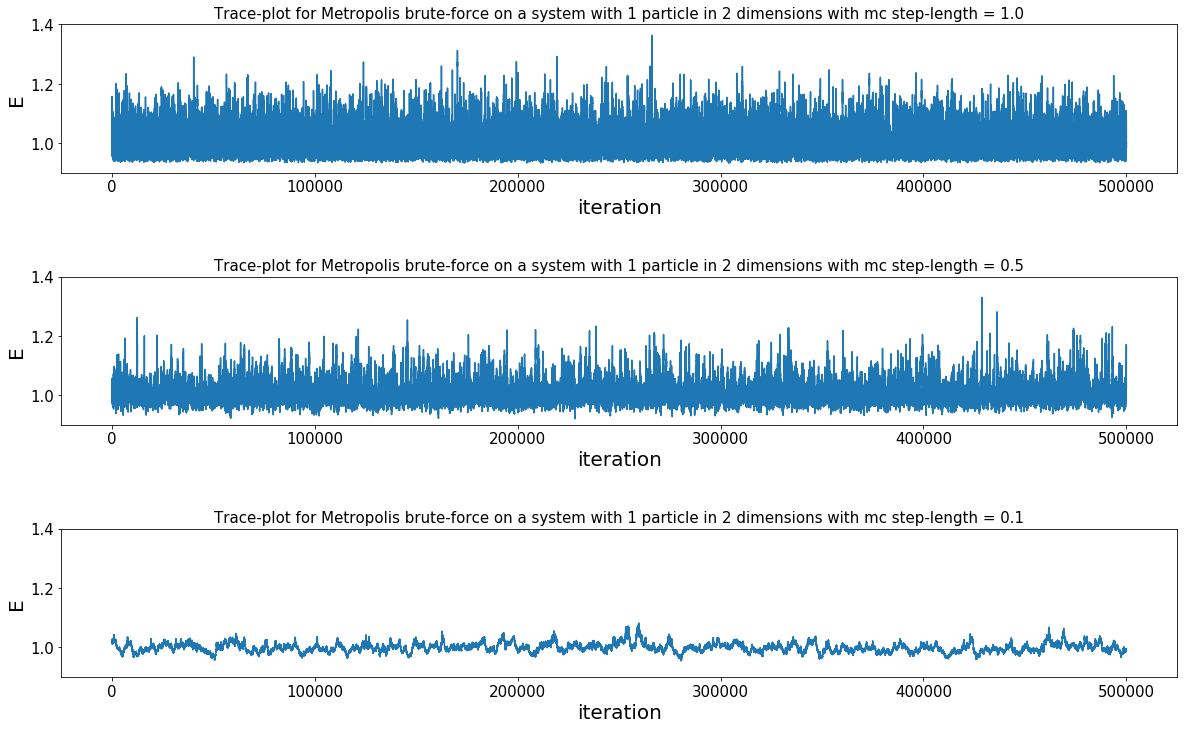

   MC step-length         A      Variance
0             1.0  0.861200  4.767153e-06
1             0.5  0.929970  2.259132e-06
2             0.1  0.986736  9.971917e-08
\begin{table}
\centering
\caption{Table of acceptance ratio and variance for Metropolis brute-force for different mc step-lengths on a system with 1 particle in 2 dimensions.}
\begin{tabular}{rrr}
\toprule
 MC step-length &         A &      Variance \\
\midrule
            1.0 &  0.861200 &  4.767153e-06 \\
            0.5 &  0.929970 &  2.259132e-06 \\
            0.1 &  0.986736 &  9.971917e-08 \\
\bottomrule
\end{tabular}
\end{table}



In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from blocking import block

# %matplotlib inline

plt.rcParams["figure.figsize"] = 20,12
plt.rcParams["xtick.labelsize"] =15
plt.rcParams["ytick.labelsize"] =15
plt.rcParams["axes.labelsize"] = 20

def acceptance_ratio(e):
    length = len(e)
    accepted =  0
    for i in range(1,length): 
        if e[i] != e[i-1]:
            accepted += 1
    print(accepted/length)
    return accepted/length
    
        

step_lengths = [1.0, 0.5, 0.1]
acceptance_ratios = []
variances = []

i = 1

for step_length in step_lengths:
    e = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_metropolis_brute_force_num_particles_1_num_dims_2_hidden_2_sigma_1.0_mc_step_length_" + str(step_length) + "_num_mc_iterations_500000.txt", skiprows=1)
    plt.subplot(3,1,i)
    
    plt.title("Trace-plot for Metropolis brute-force on a system with 1 particle in 2 dimensions with mc step-length = " + str(step_length), fontsize = 15)
    plt.xlabel("iteration")
    plt.ylabel("E")
    plt.plot(e)
    plt.ylim((0.9, 1.4))
    acceptance_ratios.append(acceptance_ratio(e))
    len_e = len(e)
    variances.append( block(e[:int(np.log2(len_e))])[1])
    print(variances[-1])
    
    i+=1

plt.subplots_adjust(hspace=0.7)
plt.savefig("plots/MCMC_Runs_metropolis_brute_force_num_particles_1_num_dims_2_hidden_2_sigma_1.0_num_mc_iterations_500000.png")
plt.show()

df = pd.DataFrame({"MC step-length" : step_lengths, "A":acceptance_ratios, "Variance": variances})
print(df)
cap = "Table of acceptance ratio and variance for Metropolis brute-force for different mc step-lengths on a system with 1 particle in 2 dimensions."
print(df.to_latex(index=False,caption = cap))

0.8612
0.92997
0.986736


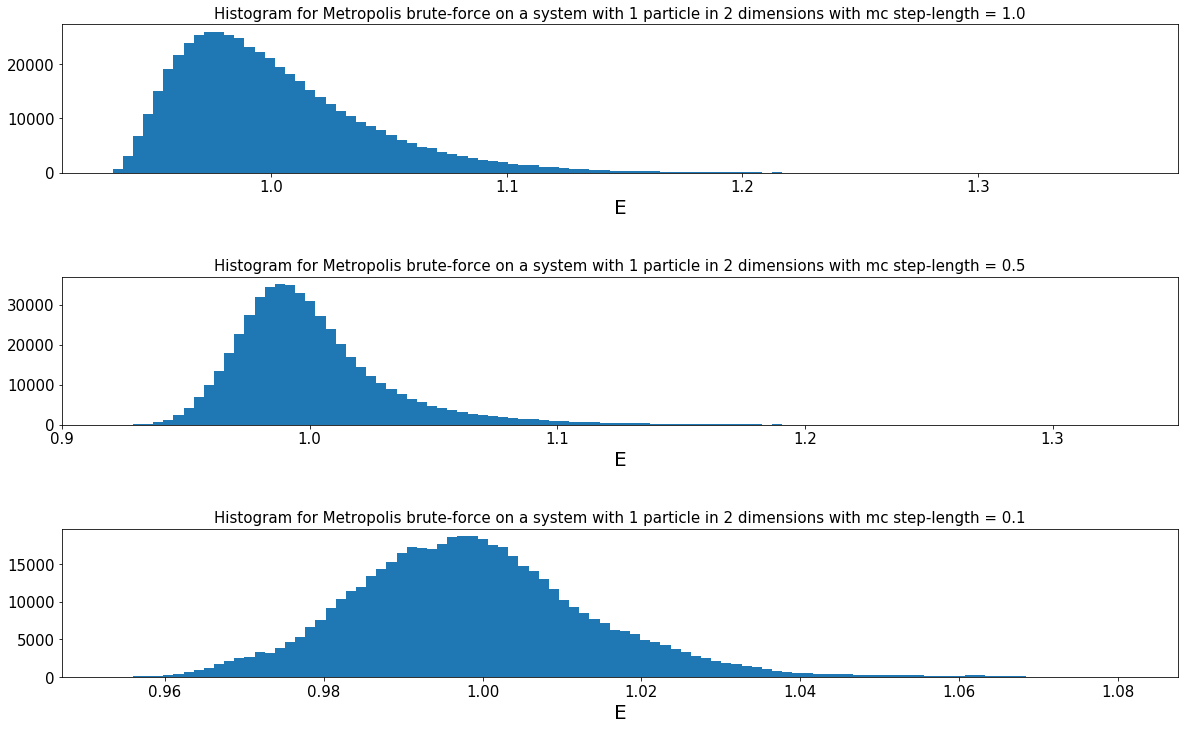

   MC step-length         A      Variance
0             1.0  0.861200  3.244040e-07
1             0.5  0.929970  4.859952e-07
2             0.1  0.986736  1.817413e-06


In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from blocking import block

# %matplotlib inline


plt.rcParams["figure.figsize"] = 20,12
plt.rcParams["xtick.labelsize"] =15
plt.rcParams["ytick.labelsize"] =15
plt.rcParams["axes.labelsize"] = 20

def acceptance_ratio(e):
    length = len(e)
    accepted =  0
    for i in range(1,length): 
        if e[i] != e[i-1]:
            accepted += 1
    print(accepted/length)
    return accepted/length
    
        

step_lengths = [1.0, 0.5, 0.1]
acceptance_ratios = []
variances = []

i = 1

for step_length in step_lengths:
    e = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_metropolis_brute_force_num_particles_1_num_dims_2_hidden_2_sigma_1.0_mc_step_length_" + str(step_length) + "_num_mc_iterations_500000.txt", skiprows=1)
    plt.subplot(3,1,i)
    plt.title("Histogram for Metropolis brute-force on a system with 1 particle in 2 dimensions with mc step-length = " + str(step_length), fontsize=15)
    plt.xlabel("E")
    plt.hist(e, bins=100)
    acceptance_ratios.append(acceptance_ratio(e))
    variances.append( block(e)[1])
    
    i+=1

plt.subplots_adjust(hspace=0.7)

plt.savefig("plots/MCMC_Runs_histogram_metropolis_brute_force_num_particles_1_num_dims_2_hidden_2_sigma_1.0_num_mc_iterations_500000.png")

plt.show()

df = pd.DataFrame({"MC step-length" : step_lengths, "A":acceptance_ratios, "Variance": variances})
print(df)

## Convergence study for Metropolis Importance Sampling. 

0.928258
0.993572
0.999794
0.999906


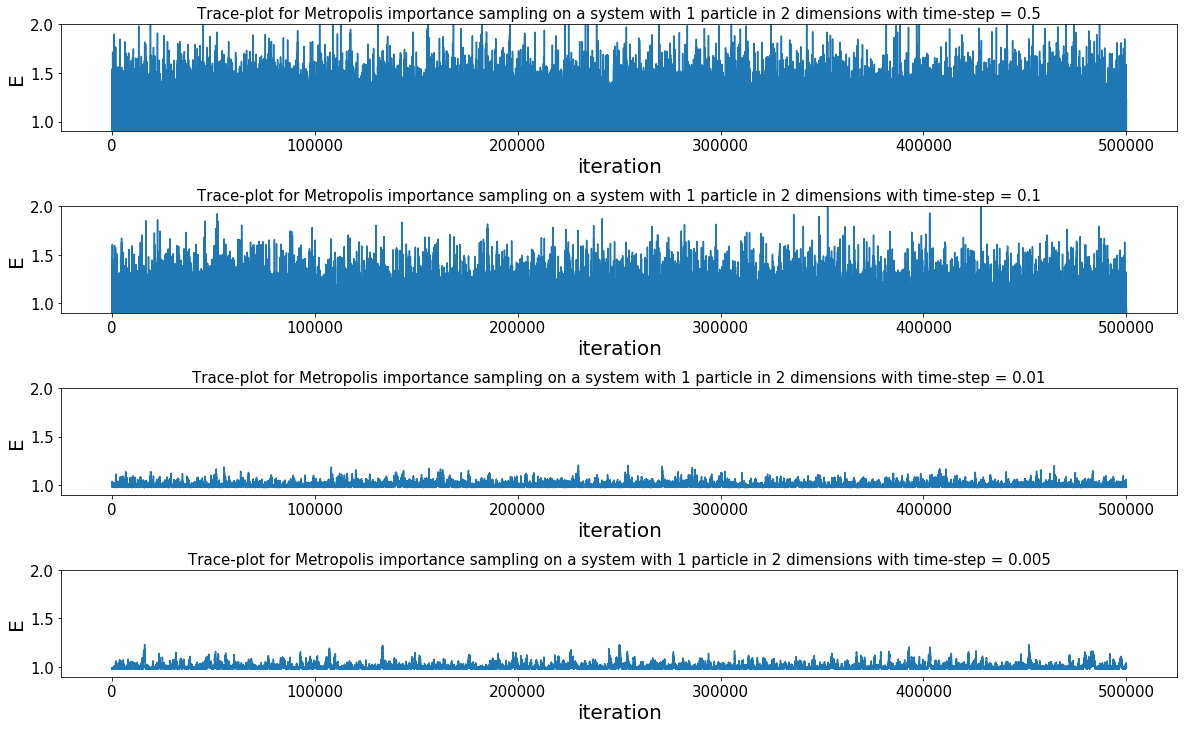

   MC step-length         A      Variance
0           0.500  0.928258  1.560764e-04
1           0.100  0.993572  3.774283e-04
2           0.010  0.999794  2.088548e-07
3           0.005  0.999906  2.741694e-08
\begin{table}
\centering
\caption{Table of acceptance ratio and variance for Metropolis importance smapling for different time-steps on a system with 1 particle in 2 dimensions.}
\begin{tabular}{rrr}
\toprule
 MC step-length &         A &      Variance \\
\midrule
          0.500 &  0.928258 &  1.560764e-04 \\
          0.100 &  0.993572 &  3.774283e-04 \\
          0.010 &  0.999794 &  2.088548e-07 \\
          0.005 &  0.999906 &  2.741694e-08 \\
\bottomrule
\end{tabular}
\end{table}



In [24]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from blocking import block

# %matplotlib inline


plt.rcParams["figure.figsize"] = 20,12
plt.rcParams["xtick.labelsize"] =15
plt.rcParams["ytick.labelsize"] =15
plt.rcParams["axes.labelsize"] = 20

def acceptance_ratio(e):
    length = len(e)
    accepted =  0
    for i in range(1,length): 
        if e[i] != e[i-1]:
            accepted += 1
    print(accepted/length)
    return accepted/length
    

time_steps = [0.5, 0.1, 0.01, 0.005]
acceptance_ratios = []
variances = []

i = 1

for time_step in time_steps:
    e = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_metropolis_importance_sampling_num_particles_1_num_dims_2_hidden_2_sigma_1.0_importance_time_step_length_" + str(time_step) + "_num_mc_iterations_500000.txt", skiprows=1)
    plt.subplot(int(len(time_steps)),1,i)
    plt.title("Trace-plot for Metropolis importance sampling on a system with 1 particle in 2 dimensions with time-step = " + str(time_step), fontsize = 15)
    plt.xlabel("iteration")
    plt.ylabel("E")
    plt.plot(e)
    plt.ylim(0.9, 2.0)
    acceptance_ratios.append(acceptance_ratio(e))
    variances.append( block(e[:int(np.log2(len_e))])[1])
    
    i+=1

plt.subplots_adjust(hspace=0.7)
plt.savefig("plots/MCMC_Runs_metropolis_importance_sampling_num_particles_1_num_dims_2_hidden_2_sigma_1.0_num_mc_iterations_500000.png")

plt.show()

df = pd.DataFrame({"MC step-length" : time_steps, "A":acceptance_ratios, "Variance": variances})
print(df)
cap = "Table of acceptance ratio and variance for Metropolis importance smapling for different time-steps on a system with 1 particle in 2 dimensions."
print(df.to_latex(index=False,caption = cap))

0.928258
0.993572
0.999794
0.999906


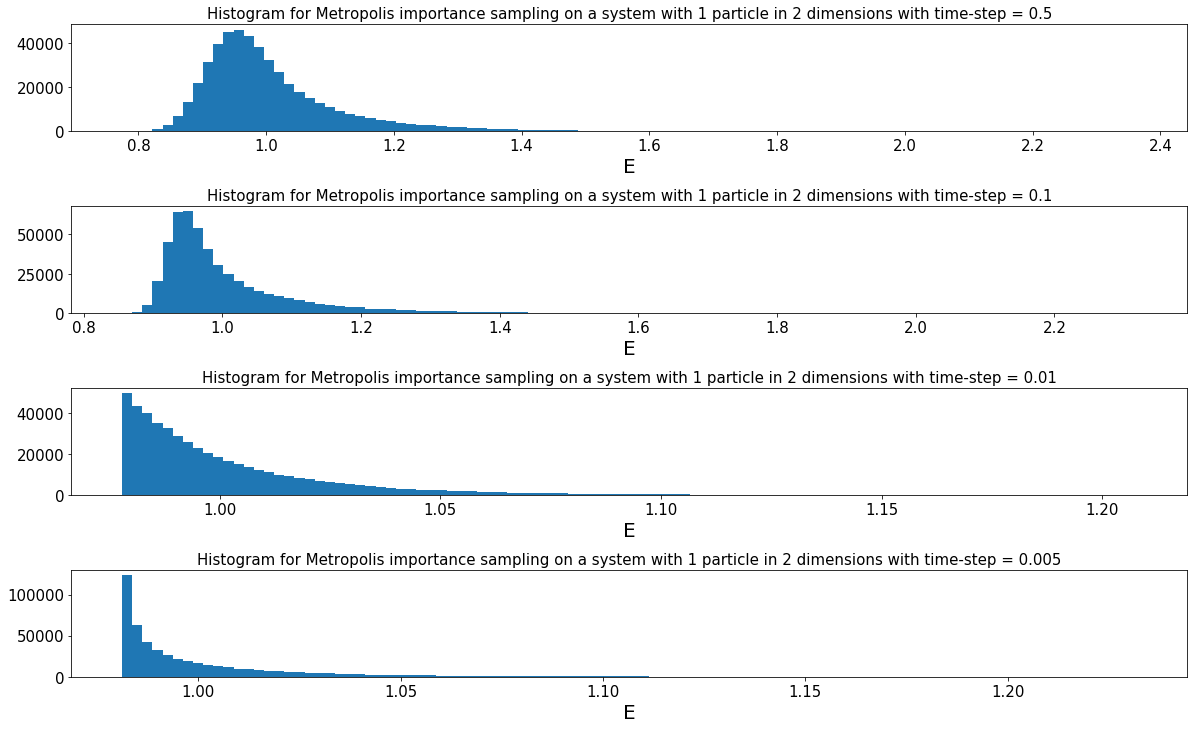

   MC step-length         A      Variance
0           0.500  0.928258  1.560764e-04
1           0.100  0.993572  3.774283e-04
2           0.010  0.999794  2.088548e-07
3           0.005  0.999906  2.741694e-08


In [25]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from blocking import block
from scipy.stats import norm

# %matplotlib inline

plt.rcParams["figure.figsize"] = 20,12
plt.rcParams["xtick.labelsize"] =15
plt.rcParams["ytick.labelsize"] =15
plt.rcParams["axes.labelsize"] = 20


def acceptance_ratio(e):
    length = len(e)
    accepted =  0
    for i in range(1,length): 
        if e[i] != e[i-1]:
            accepted += 1
    print(accepted/length)
    return accepted/length
    

time_steps = [ 0.5, 0.1, 0.01, 0.005]
acceptance_ratios = []
variances = []

i = 1

for time_step in time_steps:
    e = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_metropolis_importance_sampling_num_particles_1_num_dims_2_hidden_2_sigma_1.0_importance_time_step_length_" + str(time_step) + "_num_mc_iterations_500000.txt", skiprows=1)
    plt.subplot(int(len(time_steps)),1,i)
    plt.title("Histogram for Metropolis importance sampling on a system with 1 particle in 2 dimensions with time-step = " + str(time_step), fontsize = 15)
    plt.xlabel("E")
    plt.hist(e, bins=100)
    acceptance_ratios.append(acceptance_ratio(e))
    variances.append( block(e[:int(np.log2(len_e))])[1])
    
    i+=1
    
plt.subplots_adjust(hspace=0.7)

plt.savefig("plots/MCMC_Runs_histogram_metropolis_importance_sampling_num_particles_1_num_dims_2_hidden_2_sigma_1.0_num_mc_iterations_500000.png")

plt.show()

df = pd.DataFrame({"MC step-length" : time_steps, "A":acceptance_ratios, "Variance": variances})
print(df)

### Metropolis Brute-Force on a system of 1 particle in 2 dimensions. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


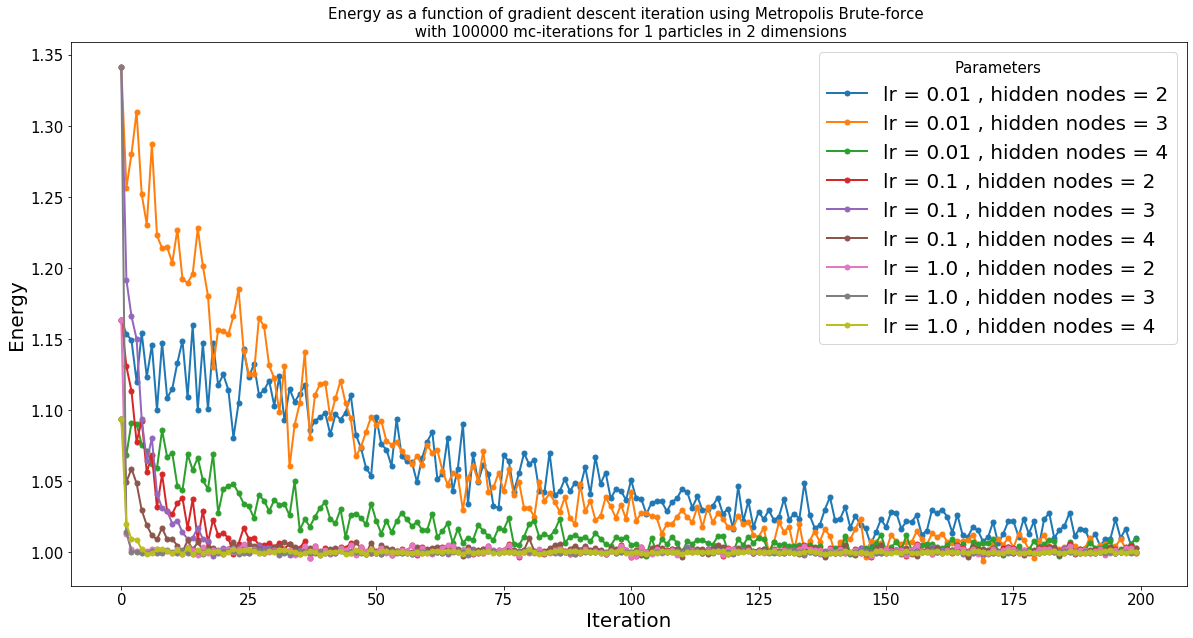

In [6]:
%load_ext autoreload
%autoreload 2
# %matplotlib qt
from plotting_tools import plot_energy

plot_energy("bf", "output/interacting_false/", 1, 2, 100000)


### Metropolis Importance Sampling for a system of 1 particle in 2 dimensions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


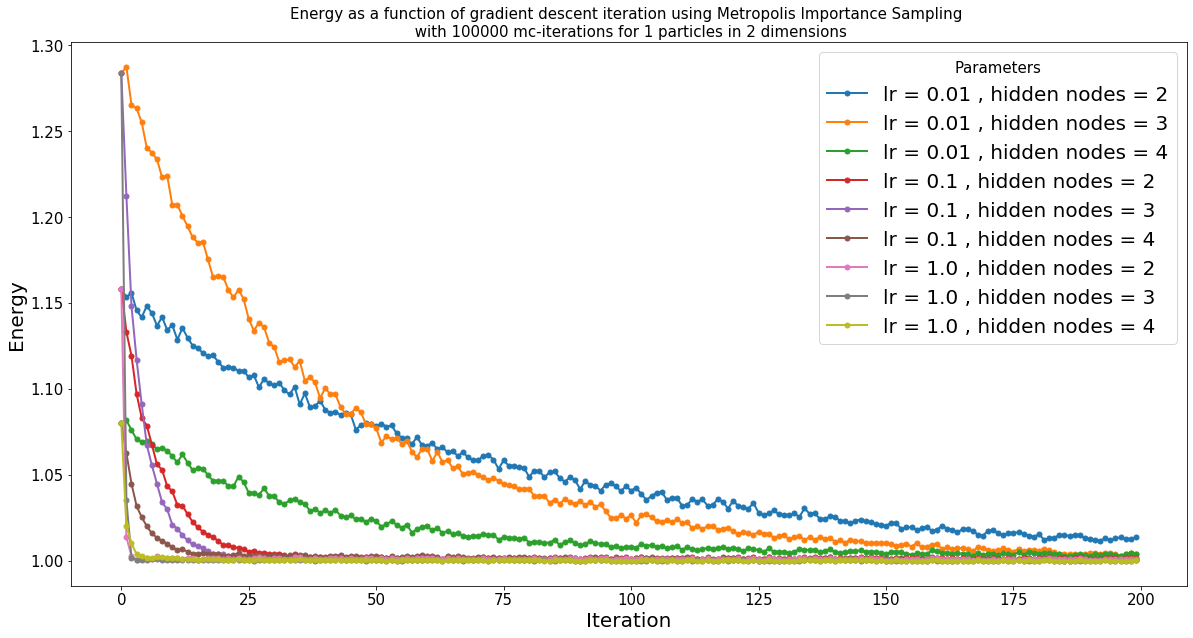

In [5]:
%load_ext autoreload
%autoreload 2
# %matplotlib qt
from plotting_tools import plot_energy
import matplotlib.pyplot as plt 


plot_energy("is", "output/interacting_false/", 1, 2, 100000)


### Gibbs Sampling on a system of 1 particle in 2 dimensions

Note that the values diverge for lr=1.0 and hidden nodes = 3. To see the plot better, uncomment the %matplotlib qt and zoom in via the plotting tools. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


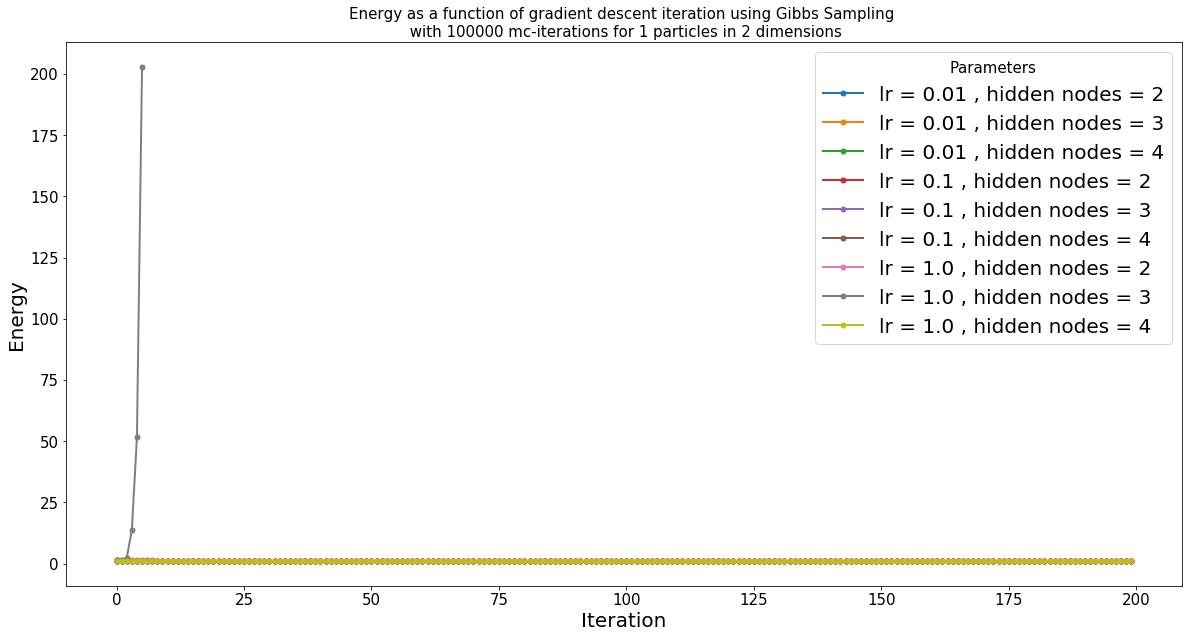

In [9]:
%load_ext autoreload
%autoreload 2
# %matplotlib qt
from plotting_tools import plot_energy
import matplotlib.pyplot as plt 

plot_energy("gs", "output/interacting_false/", 1, 2, 100000)

# A function for writing the values to a table

In [24]:
import numpy as np 
import pandas as pd
import os

optimal_energies = []
time_values = []
network_architectures = []

n_particles = 1
n_dims = 2
iterations = 100000

for filename in os.listdir("output/interacting_false/bf"):
    temp = filename.split("_")
    if int(temp[2]) == n_particles and int(temp[5]) == n_dims and int(temp[-1].split(".")[0]) == iterations:
        info = open("output/interacting_false/bf/" + filename).readlines()[0].split(" ")
        local_energies = np.loadtxt("output/interacting_false/bf/" + filename, skiprows=1)
        optimal_energies.append(float(f"{local_energies[-1]:.4f}"))
        time = float(info[1].split("=")[1])
        time_values.append(float(f"{time:.4f}"))
        network_architectures.append("lr = " + str(temp[7]) + " , hidden nodes = " + str(temp[9]))

print(optimal_energies)
print(time_values)
print(network_architectures)

exact_value = 0.5*n_particles*n_dims

errors = np.array(optimal_energies) - exact_value
relative_errors = abs(errors)/exact_value

df = pd.DataFrame({"Network Architecture": network_architectures, "Optimal Energy": optimal_energies, "Abs error": abs(errors), "Rel error": relative_errors, "Time [s]": time_values}) 
df.style.set_properties(**{"text_align": "right"})
print(df.to_latex(index=False))

[1.01, 1.0031, 1.0092, 0.9995, 1.0002, 1.0032, 0.9997, 1.0, 1.0003]
[33.872, 37.153, 39.467, 33.39, 36.616, 38.478, 32.917, 35.811, 38.051]
['lr = 0.01 , hidden nodes = 2', 'lr = 0.01 , hidden nodes = 3', 'lr = 0.01 , hidden nodes = 4', 'lr = 0.1 , hidden nodes = 2', 'lr = 0.1 , hidden nodes = 3', 'lr = 0.1 , hidden nodes = 4', 'lr = 1.0 , hidden nodes = 2', 'lr = 1.0 , hidden nodes = 3', 'lr = 1.0 , hidden nodes = 4']
\begin{tabular}{lrrrr}
\toprule
         Network Architecture &  Optimal Energy &  Abs error &  Rel error &  Time [s] \\
\midrule
 lr = 0.01 , hidden nodes = 2 &          1.0100 &     0.0100 &     0.0100 &    33.872 \\
 lr = 0.01 , hidden nodes = 3 &          1.0031 &     0.0031 &     0.0031 &    37.153 \\
 lr = 0.01 , hidden nodes = 4 &          1.0092 &     0.0092 &     0.0092 &    39.467 \\
  lr = 0.1 , hidden nodes = 2 &          0.9995 &     0.0005 &     0.0005 &    33.390 \\
  lr = 0.1 , hidden nodes = 3 &          1.0002 &     0.0002 &     0.0002 &    36.616 \\
  

## Tabular values of the optimal energy found, the error and the computational time.

Written to latex for easy inserting in the latex file. 

In [25]:
%load_ext autoreload
%autoreload 2

from plotting_tools import create_table_non_interacting

create_table_non_interacting("bf", "output/interacting_false/", 1, 2, 100000)
create_table_non_interacting("is", "output/interacting_false/", 1, 2, 100000)
create_table_non_interacting("gs", "output/interacting_false/", 1, 2, 100000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
\begin{table}
\centering
\caption{Optimal energy, error and time for different network architectures using Metropolis Brute-force on a non-interacting system with 1 particles in 2 dimensions. Using $\sigma^2 = $1.0, MC-iterations = 100000 and MC step-length = 0.5}
\begin{tabular}{lrrrr}
\toprule
         Network Architecture &  Optimal Energy &  Abs error &  Rel error &  Time [s] \\
\midrule
 lr = 0.01 , hidden nodes = 2 &          1.0109 &     0.0109 &     0.0109 &    33.872 \\
 lr = 0.01 , hidden nodes = 3 &          1.0045 &     0.0045 &     0.0045 &    37.153 \\
 lr = 0.01 , hidden nodes = 4 &          1.0044 &     0.0044 &     0.0044 &    39.467 \\
  lr = 0.1 , hidden nodes = 2 &          1.0013 &     0.0013 &     0.0013 &    33.390 \\
  lr = 0.1 , hidden nodes = 3 &          1.0004 &     0.0004 &     0.0004 &    36.616 \\
  lr = 0.1 , hidden nodes = 4 &          1.0011 &     0.0011 &     0.001

# 1 particle in 2 dimension with optimal parameters

\begin{table}
\centering
\caption{test}
\begin{tabular}{lrr}
\toprule
                  Method &         E &      Variance \\
\midrule
 Gibbs \$\textbackslash sigma\textasciicircum 2 = 0.46\$ &  1.000029 &  5.178936e-11 \\
 Gibbs \$\textbackslash sigma\textasciicircum 2 = 0.48\$ &  1.000006 &  3.445578e-12 \\
 Gibbs \$\textbackslash sigma\textasciicircum 2 = 0.50\$ &  1.001319 &  1.018195e-09 \\
\bottomrule
\end{tabular}
\end{table}



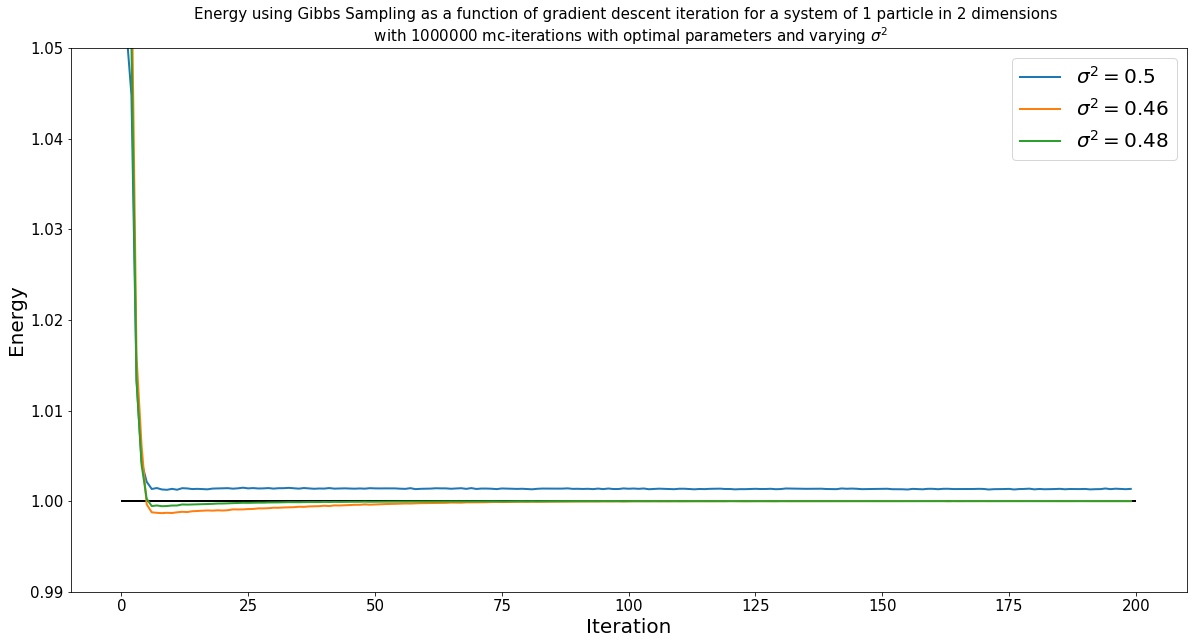

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from blocking import block


plt.rcParams["figure.figsize"] = 20,10
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["xtick.labelsize"] =15
plt.rcParams["ytick.labelsize"] =15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.title_fontsize"] = 15

exact = 1

gs_05 = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_gibbs_sampling_num_particles_1_num_dims_2_hidden_4_sigma_0.5_num_mc_iterations_1000000.txt", skiprows=1)
gibbs_05_E, gibbs_05_Var = (block(gs_05))
gs_046 = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_gibbs_sampling_num_particles_1_num_dims_2_hidden_4_sigma_0.46_num_mc_iterations_1000000.txt", skiprows=1)
gibbs_046_E, gibbs_046_Var = (block(gs_046))
gs_048 = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_gibbs_sampling_num_particles_1_num_dims_2_hidden_4_sigma_0.48_num_mc_iterations_1000000.txt", skiprows=1)
gibbs_048_E, gibbs_048_Var = (block(gs_048))
# gs_052 = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_gibbs_sampling_num_particles_1_num_dims_2_hidden_4_sigma_0.52_num_mc_iterations_1000000.txt", skiprows=1)
# gibbs_052_E, gibbs_052_Var = (block(gs_052))
df = pd.DataFrame({"Method": [r"Gibbs $\sigma^2 = 0.46$",r"Gibbs $\sigma^2 = 0.48$",r"Gibbs $\sigma^2 = 0.50$"], "E":[ gibbs_046_E,gibbs_048_E, gibbs_05_E],"Variance":[gibbs_046_Var,gibbs_048_Var, gibbs_05_Var ]})
print(df.to_latex(index=False, caption="test"))

convergence_gs_05 = np.loadtxt("output/interacting_false/optimal/gs_optim_num_particles_1_num_dims_2_lr_1.0_hidden_4_sigma_0.5_num_mc_iterations_1000000.txt", skiprows=1)
convergence_gs_046 = np.loadtxt("output/interacting_false/optimal/gs_optim_num_particles_1_num_dims_2_lr_1.0_hidden_4_sigma_0.46_num_mc_iterations_1000000.txt", skiprows=1)
convergence_gs_048 = np.loadtxt("output/interacting_false/optimal/gs_optim_num_particles_1_num_dims_2_lr_1.0_hidden_4_sigma_0.48_num_mc_iterations_1000000.txt", skiprows=1)
# convergence_gs_052 = np.loadtxt("output/interacting_false/optimal/gs_optim_num_particles_1_num_dims_2_lr_1.0_hidden_4_sigma_0.52_num_mc_iterations_1000000.txt", skiprows=1)

plt.plot(convergence_gs_05)
plt.hlines(exact,0,200)
plt.plot(convergence_gs_046)
plt.plot(convergence_gs_048)
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.title("Energy using Gibbs Sampling as a function of gradient descent iteration for a system of 1 particle in 2 dimensions \n with 1000000 mc-iterations with optimal parameters and varying $\sigma^2$", fontsize=15)
# plt.plot(convergence_gs_052)
plt.legend([r"$\sigma^2 = 0.5$",r"$\sigma^2 = 0.46$", r"$\sigma^2=0.48$"])
plt.ylim(0.99, 1.05)
plt.savefig("plots/non_interacting_num_particles_1_num_dims_2_gibbs_varying_sigma.png")
plt.show()

                Method         E      Variance            Time [s]
0          Brute-Force  1.000146  3.474843e-08  1.8390002250671387
1  Importance-Sampling  1.000034  1.430919e-09  1.7339999675750732
2       Gibbs-Sampling  1.000006  3.445578e-12  1.7030000686645508
\begin{table}
\centering
\caption{}
\begin{tabular}{lrrl}
\toprule
              Method &         E &      Variance &            Time [s] \\
\midrule
         Brute-Force &  1.000146 &  3.474843e-08 &  1.8390002250671387 \\
 Importance-Sampling &  1.000034 &  1.430919e-09 &  1.7339999675750732 \\
      Gibbs-Sampling &  1.000006 &  3.445578e-12 &  1.7030000686645508 \\
\bottomrule
\end{tabular}
\end{table}



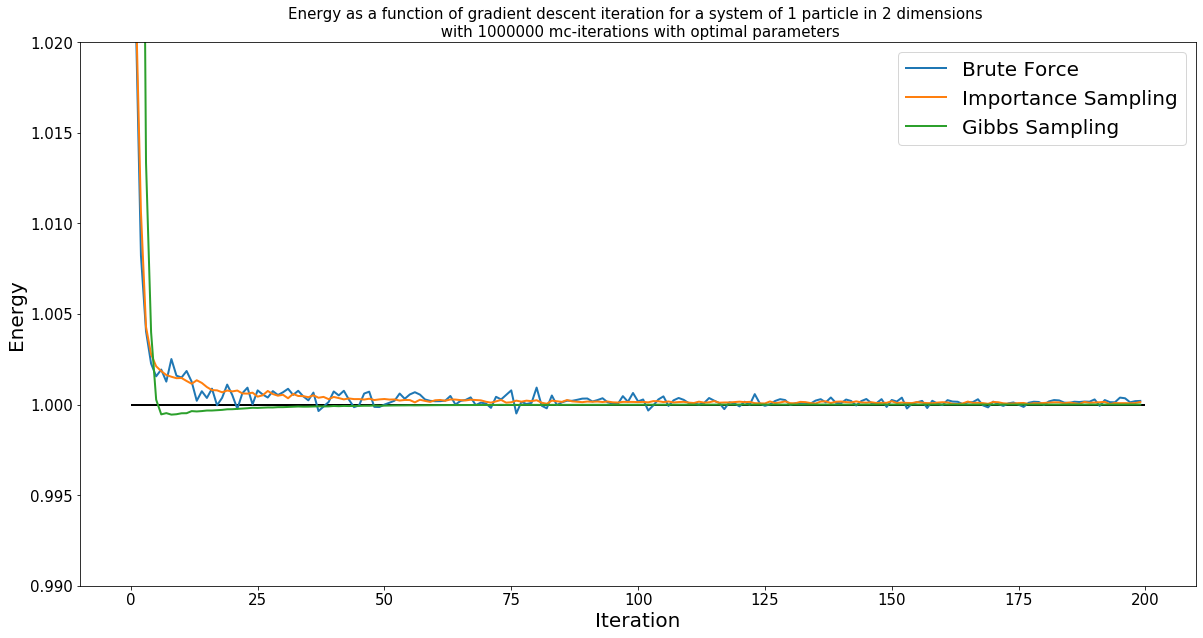

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from blocking import block

#Setting up the plot
plt.rcParams["figure.figsize"] = 20,10
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["xtick.labelsize"] =15
plt.rcParams["ytick.labelsize"] =15 
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.title_fontsize"] = 15

exact = 1

info_bf = open("output/MCMC_Runs/interacting_false/MCMC_Runs_metropolis_brute_force_num_particles_1_num_dims_2_hidden_4_sigma_1.0_mc_step_length_0.5_num_mc_iterations_1000000.txt").readlines()[0].split(" ")
bf = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_metropolis_brute_force_num_particles_1_num_dims_2_hidden_4_sigma_1.0_mc_step_length_0.5_num_mc_iterations_1000000.txt", skiprows=1)
bf_E, bf_Var = (block(bf))
bf_time = info_bf[1].split("=")[1]

info_importance = open("output/MCMC_Runs/interacting_false/MCMC_Runs_metropolis_importance_sampling_num_particles_1_num_dims_2_hidden_4_sigma_1.0_importance_time_step_length_0.5_num_mc_iterations_1000000.txt").readlines()[0].split(" ")
importance = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_metropolis_importance_sampling_num_particles_1_num_dims_2_hidden_4_sigma_1.0_importance_time_step_length_0.5_num_mc_iterations_1000000.txt", skiprows=1)
importance_E, importance_Var = (block(importance))
is_time = info_importance[1].split("=")[1]

info_gibbs = open("output/MCMC_Runs/interacting_false/MCMC_Runs_gibbs_sampling_num_particles_1_num_dims_2_hidden_4_sigma_0.48_num_mc_iterations_1000000.txt").readlines()[0].split(" ")
gs = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_gibbs_sampling_num_particles_1_num_dims_2_hidden_4_sigma_0.48_num_mc_iterations_1000000.txt", skiprows=1)
gibbs_E, gibbs_Var = (block(gs))
gs_time = info_gibbs[1].split("=")[1]

df = pd.DataFrame({"Method": ["Brute-Force", "Importance-Sampling", "Gibbs-Sampling"], "E":[bf_E, importance_E, gibbs_E],"Variance":[bf_Var, importance_Var, gibbs_Var], "Time [s]": [bf_time, is_time, gs_time]})
print(df)
print(df.to_latex(index=False, caption = ""))

convergence_bf = np.loadtxt("output/interacting_false/optimal/bf_optim_num_particles_1_num_dims_2_lr_1.0_hidden_4_sigma_1.0_bf_step_length_0.5_num_mc_iterations_1000000.txt", skiprows=1)
convergence_importance = np.loadtxt("output/interacting_false/optimal/is_optim_num_particles_1_num_dims_2_lr_1.0_hidden_4_sigma_1.0_is_step_length_0.5_num_mc_iterations_1000000.txt", skiprows=1)
convergence_gibbs = np.loadtxt("output/interacting_false/optimal/gs_optim_num_particles_1_num_dims_2_lr_1.0_hidden_4_sigma_0.48_num_mc_iterations_1000000.txt", skiprows=1)

plt.plot(convergence_bf)
plt.hlines(exact,0,200)
plt.plot(convergence_importance)
plt.plot(convergence_gibbs)
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.legend(["Brute Force", "Importance Sampling", "Gibbs Sampling"])
plt.title("Energy as a function of gradient descent iteration for a system of 1 particle in 2 dimensions \n with 1000000 mc-iterations with optimal parameters", fontsize=15)
plt.ylim(0.99, 1.02)
plt.savefig("plots/1particle2dims_optimal.png")
plt.show()


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from blocking import block

#Setting up the plot
plt.rcParams["figure.figsize"] = 20,10
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["xtick.labelsize"] =15
plt.rcParams["ytick.labelsize"] =15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.title_fontsize"] = 15

exact = 1

bf = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_metropolis_brute_force_num_particles_2_num_dims_3_hidden_3_sigma_1.0_mc_step_length_0.5_num_mc_iterations_1000000.txt", skiprows=1)
bf_E, bf_Var = (block(bf))
importance = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_metropolis_importance_sampling_num_particles_1_num_dims_2_hidden_4_sigma_1.0_importance_time_step_length_0.5_num_mc_iterations_1000000.txt", skiprows=1)
importance_E, importance_Var = (block(importance))
gs = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_gibbs_sampling_num_particles_1_num_dims_2_hidden_4_sigma_0.5_num_mc_iterations_1000000.txt", skiprows=1)
gibbs_E, gibbs_Var = (block(gs))
df = pd.DataFrame({"Method": ["Brute-Force", "Importance-Sampling", "Gibbs-Sampling"], "E":[bf_E, importance_E, gibbs_E],"Variance":[bf_Var, importance_Var, gibbs_Var]})
print(df)

convergence_bf = np.loadtxt("output/interacting_false/optimal/bf_optim_num_particles_1_num_dims_2_lr_1.0_hidden_4_sigma_1.0_bf_step_length_0.5_num_mc_iterations_1000000.txt", skiprows=1)
convergence_importance = np.loadtxt("output/interacting_false/optimal/is_optim_num_particles_1_num_dims_2_lr_1.0_hidden_4_sigma_1.0_is_step_length_0.5_num_mc_iterations_1000000.txt", skiprows=1)
convergence_gibbs = np.loadtxt("output/interacting_false/optimal/gs_optim_num_particles_1_num_dims_2_lr_1.0_hidden_4_sigma_0.5_num_mc_iterations_1000000.txt", skiprows=1)

plt.plot(convergence_bf)
plt.hlines(exact,0,200)
plt.plot(convergence_importance)
plt.plot(convergence_gibbs)
plt.xlabel("Iteration")
plt.ylabel("E")
plt.legend(["Brute Force", "Importance Sampling", "Gibbs Sampling"])
plt.title("Energy as a function of gradient descent iteration for a system of 1 particle in 2 dimensions \n with 100000 mc-iterations with optimal parameters", fontsize=15)
plt.ylim(0.99, 1.02)
plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
\begin{table}
\centering
\caption{Optimal energy, error and time for different network architectures using Metropolis Brute-force on a non-interacting system with 2 particles in 3 dimensions. Using $\sigma^2 = $1.0, MC-iterations = 100000 and MC step-length = 0.5 and 200 optimization steps.}
\begin{tabular}{lrrrr}
\toprule
         Network Architecture &  Optimal Energy &  Abs error &   Rel error &  Time [s] \\
\midrule
 lr = 0.01 , hidden nodes = 2 &          3.0315 &     0.0315 &    0.010500 &    41.685 \\
 lr = 0.01 , hidden nodes = 3 &          3.0215 &     0.0215 &    0.007167 &    47.797 \\
 lr = 0.01 , hidden nodes = 4 &          3.0162 &     0.0162 &    0.005400 &    52.851 \\
  lr = 0.1 , hidden nodes = 2 &          3.0064 &     0.0064 &    0.002133 &    41.604 \\
  lr = 0.1 , hidden nodes = 3 &          3.0052 &     0.0052 &    0.001733 &    47.456 \\
  lr = 0.1 , hidden nodes = 4 &       

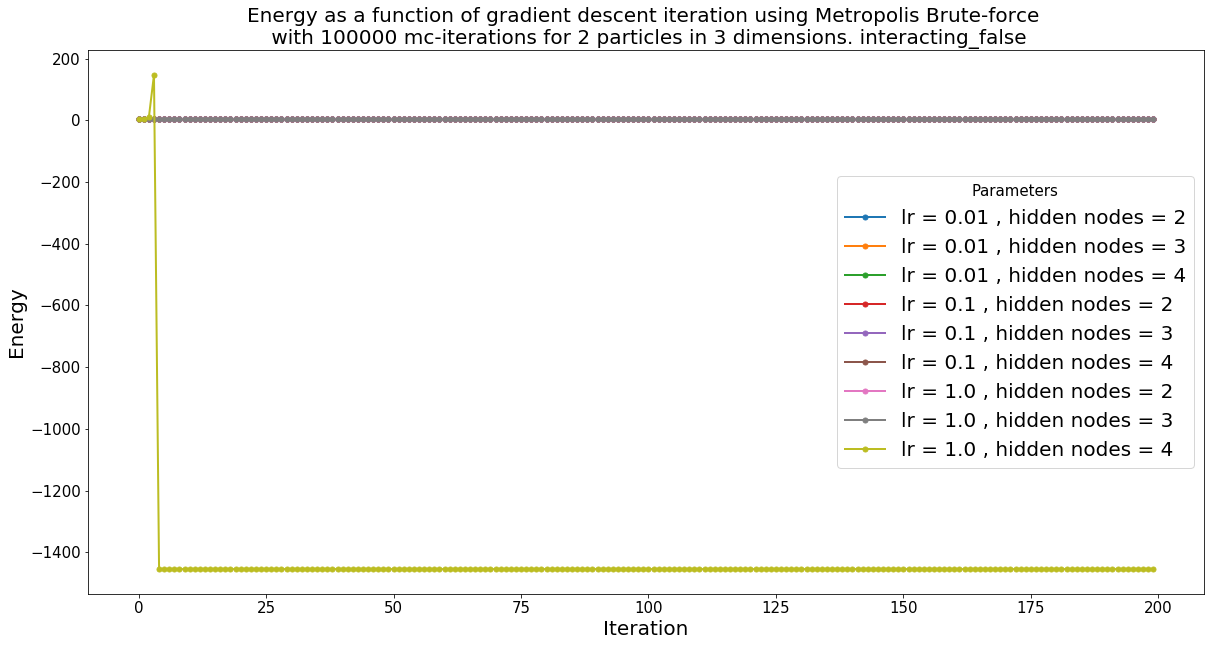

In [18]:
%load_ext autoreload
%autoreload 2
# %matplotlib qt
from plotting_tools import plot_energy

from plotting_tools import create_table_non_interacting

create_table_non_interacting("bf", "output/interacting_false/", 2, 3, 100000)

plot_energy("bf", "output/interacting_false/", 2, 3, 100000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
\begin{table}
\centering
\caption{Optimal energy, error and time for different network architectures using Metropolis Importance Sampling on a non-interacting system with 2 particles in 3 dimensions. Using $\sigma^2 = $1.0, MC-iterations = 100000 and MC step-length = 0.5 and 200 optimization steps.}
\begin{tabular}{lrrrr}
\toprule
         Network Architecture &  Optimal Energy &  Abs error &  Rel error &  Time [s] \\
\midrule
 lr = 0.01 , hidden nodes = 2 &          3.0344 &     0.0344 &   0.011467 &    39.692 \\
 lr = 0.01 , hidden nodes = 3 &          3.0122 &     0.0122 &   0.004067 &    46.382 \\
 lr = 0.01 , hidden nodes = 4 &          3.0139 &     0.0139 &   0.004633 &    51.938 \\
  lr = 0.1 , hidden nodes = 2 &          3.0030 &     0.0030 &   0.001000 &    39.642 \\
  lr = 0.1 , hidden nodes = 3 &          3.0020 &     0.0020 &   0.000667 &    46.040 \\
  lr = 0.1 , hidden nodes = 4 &     

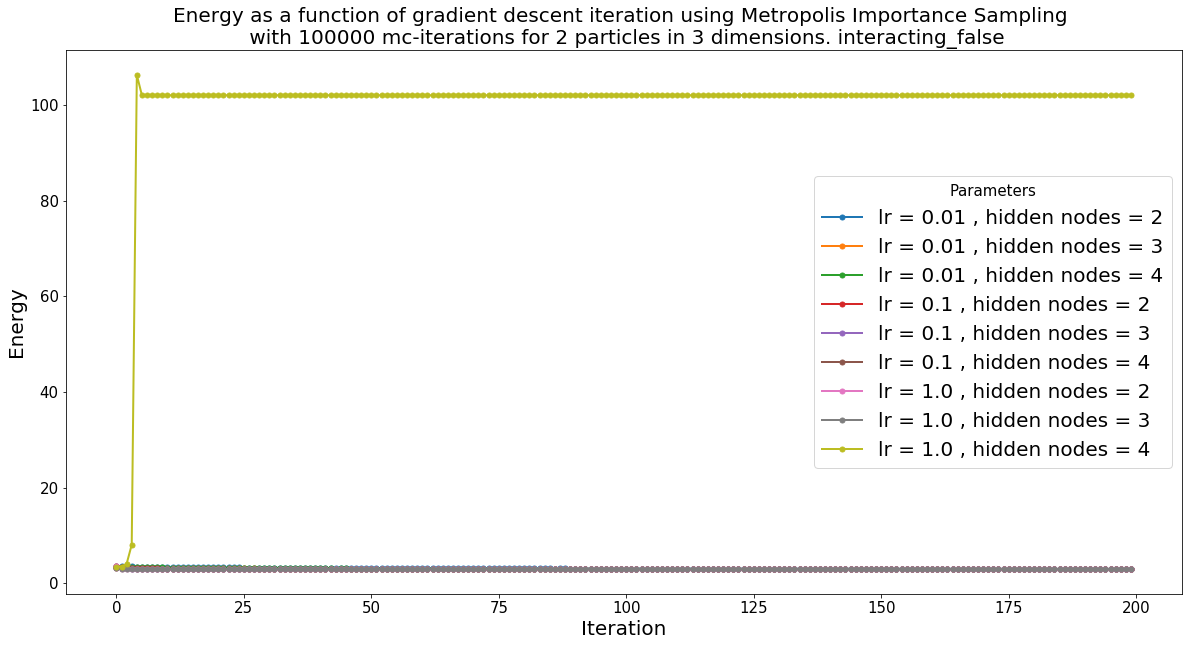

In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from plotting_tools import plot_energy, create_table_non_interacting
import matplotlib.pyplot as plt 

create_table_non_interacting("is", "output/interacting_false/", 2, 3, 100000)

plot_energy("is", "output/interacting_false/", 2, 3, 100000)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
\begin{table}
\centering
\caption{Optimal energy, error and time for different network architectures using Gibbs Sampling on a non-interacting system with 2 particles in 3 dimensions. Using $\sigma^2 = $0.5 and MC-iterations = 100000 and 200 optimization steps.}
\begin{tabular}{lrrrr}
\toprule
         Network Architecture &  Optimal Energy &  Abs error &  Rel error &  Time [s] \\
\midrule
 lr = 0.01 , hidden nodes = 2 &          3.0372 &     0.0372 &   0.012400 &    41.155 \\
 lr = 0.01 , hidden nodes = 3 &          3.0128 &     0.0128 &   0.004267 &    47.021 \\
 lr = 0.01 , hidden nodes = 4 &          3.0275 &     0.0275 &   0.009167 &    53.389 \\
  lr = 0.1 , hidden nodes = 2 &          3.0187 &     0.0187 &   0.006233 &    40.434 \\
  lr = 0.1 , hidden nodes = 3 &          3.0082 &     0.0082 &   0.002733 &    46.652 \\
  lr = 0.1 , hidden nodes = 4 &          3.0240 &     0.0240 &   0.008000 

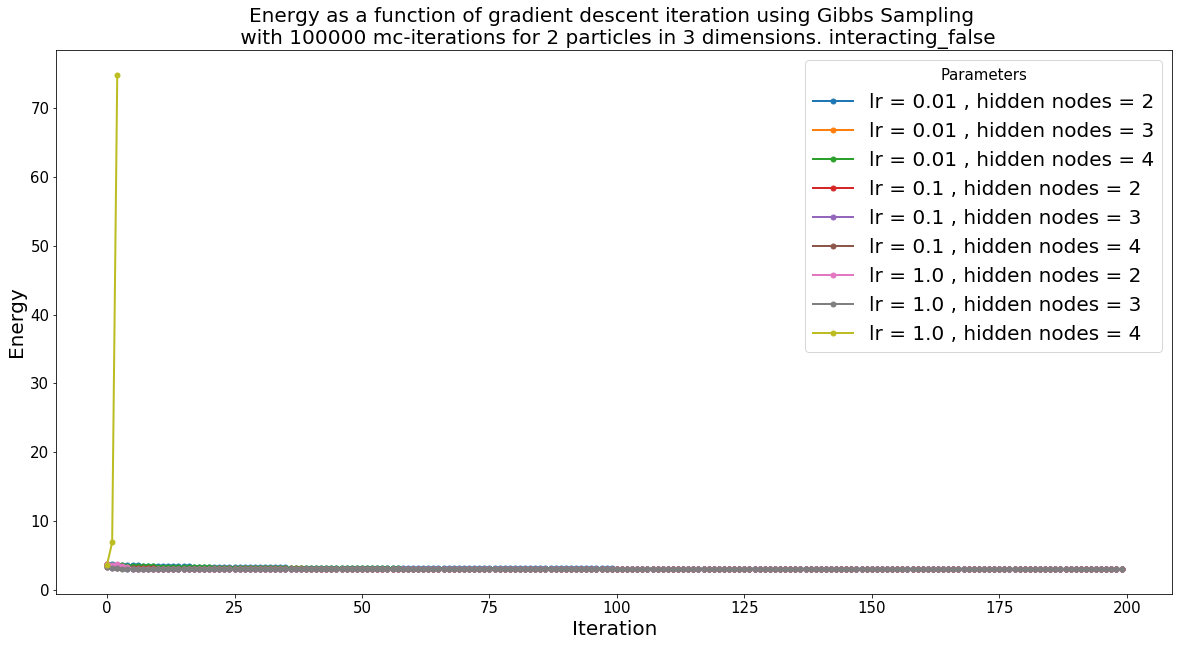

In [21]:
%load_ext autoreload
%autoreload 2
# %matplotlib qt
from plotting_tools import plot_energy
import matplotlib.pyplot as plt 

create_table_non_interacting("gs", "output/interacting_false/", 2, 3, 100000)

plot_energy("gs", "output/interacting_false/", 2, 3, 100000)


\begin{table}
\centering
\caption{test}
\begin{tabular}{lrr}
\toprule
                  Method &         E &      Variance \\
\midrule
 Gibbs \$\textbackslash sigma\textasciicircum 2 = 0.48\$ &  3.005347 &  8.123279e-09 \\
 Gibbs \$\textbackslash sigma\textasciicircum 2 = 0.50\$ &  3.006696 &  7.830133e-09 \\
 Gibbs \$\textbackslash sigma\textasciicircum 2 = 0.52\$ &  3.011223 &  2.158457e-08 \\
\bottomrule
\end{tabular}
\end{table}



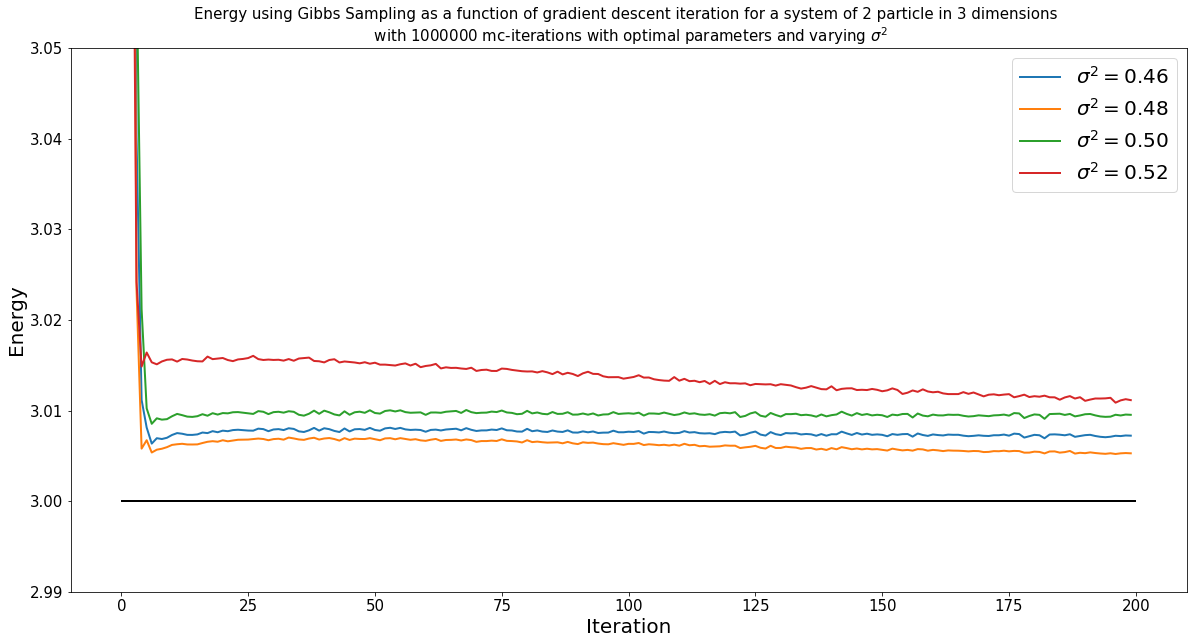

In [22]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from blocking import block


plt.rcParams["figure.figsize"] = 20,10
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["xtick.labelsize"] =15
plt.rcParams["ytick.labelsize"] =15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.title_fontsize"] = 15

exact = 3

gs_05 = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_gibbs_sampling_num_particles_2_num_dims_3_hidden_3_sigma_0.5_num_mc_iterations_1000000.txt", skiprows=1)
gibbs_05_E, gibbs_05_Var = (block(gs_05))
gs_046 = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_gibbs_sampling_num_particles_2_num_dims_3_hidden_3_sigma_0.46_num_mc_iterations_1000000.txt", skiprows=1)
gibbs_046_E, gibbs_046_Var = (block(gs_046))
gs_048 = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_gibbs_sampling_num_particles_2_num_dims_3_hidden_3_sigma_0.48_num_mc_iterations_1000000.txt", skiprows=1)
gibbs_048_E, gibbs_048_Var = (block(gs_048))
gs_052 = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_gibbs_sampling_num_particles_2_num_dims_3_hidden_3_sigma_0.52_num_mc_iterations_1000000.txt", skiprows=1)
gibbs_052_E, gibbs_052_Var = (block(gs_052))
df = pd.DataFrame({"Method": [r"Gibbs $\sigma^2 = 0.48$",r"Gibbs $\sigma^2 = 0.50$",r"Gibbs $\sigma^2 = 0.52$"], "E":[gibbs_048_E, gibbs_05_E, gibbs_052_E],"Variance":[gibbs_048_Var, gibbs_05_Var, gibbs_052_Var ]})
print(df.to_latex(index=False, caption="test"))

convergence_gs_05 = np.loadtxt("output/interacting_false/optimal/gs_optim_num_particles_2_num_dims_3_lr_1.0_hidden_3_sigma_0.5_num_mc_iterations_1000000.txt", skiprows=1)
convergence_gs_046 = np.loadtxt("output/interacting_false/optimal/gs_optim_num_particles_2_num_dims_3_lr_1.0_hidden_3_sigma_0.46_num_mc_iterations_1000000.txt", skiprows=1)
convergence_gs_048 = np.loadtxt("output/interacting_false/optimal/gs_optim_num_particles_2_num_dims_3_lr_1.0_hidden_3_sigma_0.48_num_mc_iterations_1000000.txt", skiprows=1)
convergence_gs_052 = np.loadtxt("output/interacting_false/optimal/gs_optim_num_particles_2_num_dims_3_lr_1.0_hidden_3_sigma_0.52_num_mc_iterations_1000000.txt", skiprows=1)

plt.hlines(exact,0,200)
plt.plot(convergence_gs_046)
plt.plot(convergence_gs_048)
plt.plot(convergence_gs_05)
plt.plot(convergence_gs_052)
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.title("Energy using Gibbs Sampling as a function of gradient descent iteration for a system of 2 particle in 3 dimensions \n with 1000000 mc-iterations with optimal parameters and varying $\sigma^2$", fontsize=15)
# plt.plot(convergence_gs_052)
plt.legend([r"$\sigma^2 = 0.46$", r"$\sigma^2=0.48$", r"$\sigma^2 = 0.50$", r"$\sigma^2=0.52$"])
plt.ylim(2.99, 3.05)
plt.savefig("plots/non_interacting_num_particles_2_num_dims_3_gibbs_varying_sigma.png")
plt.show()

                Method         E      Variance
0          Brute-Force  3.001203  6.937688e-07
1  Importance-Sampling  3.000751  2.967982e-08
2       Gibbs-Sampling  3.005347  8.123279e-09
\begin{table}
\centering
\caption{test}
\begin{tabular}{lrr}
\toprule
              Method &         E &      Variance \\
\midrule
         Brute-Force &  3.001203 &  6.937688e-07 \\
 Importance-Sampling &  3.000751 &  2.967982e-08 \\
      Gibbs-Sampling &  3.005347 &  8.123279e-09 \\
\bottomrule
\end{tabular}
\end{table}



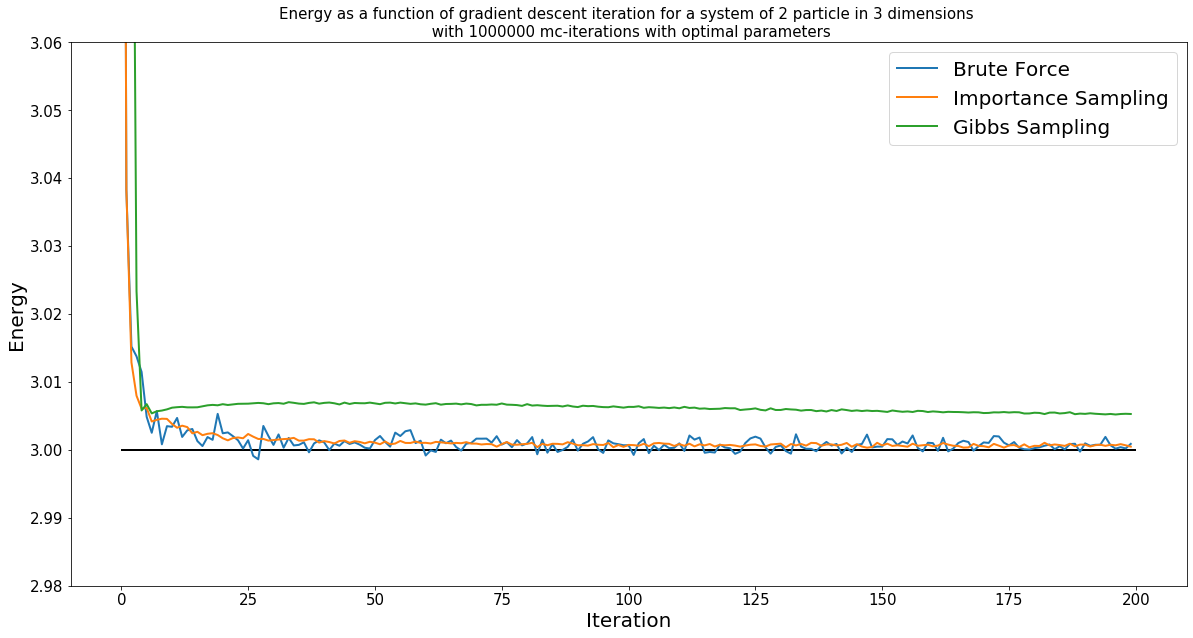

In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from blocking import block


plt.rcParams["figure.figsize"] = 20,10
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["xtick.labelsize"] =15
plt.rcParams["ytick.labelsize"] =15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.title_fontsize"] = 15

exact = 3

bf = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_metropolis_brute_force_num_particles_2_num_dims_3_hidden_3_sigma_1.0_mc_step_length_0.5_num_mc_iterations_1000000.txt", skiprows=1)
bf_E, bf_Var = (block(bf))
importance = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_metropolis_importance_sampling_num_particles_2_num_dims_3_hidden_3_sigma_1.0_importance_time_step_length_0.5_num_mc_iterations_1000000.txt", skiprows=1)
importance_E, importance_Var = (block(importance))
gs = np.loadtxt("output/MCMC_Runs/interacting_false/MCMC_Runs_gibbs_sampling_num_particles_2_num_dims_3_hidden_3_sigma_0.48_num_mc_iterations_1000000.txt", skiprows=1)
gibbs_E, gibbs_Var = (block(gs))
df = pd.DataFrame({"Method": ["Brute-Force", "Importance-Sampling", "Gibbs-Sampling"], "E":[bf_E, importance_E, gibbs_E],"Variance":[bf_Var, importance_Var, gibbs_Var]})
print(df)
print(df.to_latex(index=False, caption="test"))

convergence_bf = np.loadtxt("output/interacting_false/optimal/bf_optim_num_particles_2_num_dims_3_lr_1.0_hidden_3_sigma_1.0_bf_step_length_0.5_num_mc_iterations_1000000.txt", skiprows=1)
convergence_importance = np.loadtxt("output/interacting_false/optimal/is_optim_num_particles_2_num_dims_3_lr_1.0_hidden_3_sigma_1.0_is_step_length_0.5_num_mc_iterations_1000000.txt", skiprows=1)
convergence_gibbs = np.loadtxt("output/interacting_false/optimal/gs_optim_num_particles_2_num_dims_3_lr_1.0_hidden_3_sigma_0.48_num_mc_iterations_1000000.txt", skiprows=1)

plt.plot(convergence_bf)
plt.hlines(exact,0,200)
plt.plot(convergence_importance)
plt.plot(convergence_gibbs)
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.legend(["Brute Force", "Importance Sampling", "Gibbs Sampling"])
plt.title("Energy as a function of gradient descent iteration for a system of 2 particle in 3 dimensions \n with 1000000 mc-iterations with optimal parameters", fontsize=15)
plt.ylim(2.98, 3.06)
plt.savefig("plots/2particle3dims_optimal.png")
plt.show()